In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False
import os
import joblib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


In [2]:
X = joblib.load('/content/drive/MyDrive/minor_rnn/X')
y = joblib.load('/content/drive/MyDrive/minor_rnn/y')
X.shape, y.shape

((8584, 80, 3), (8584,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, 
                                                    stratify = y)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
model = keras.Sequential()

model.add(layers.LSTM(128, return_sequences=True,input_shape=(80,3),dropout=0.1))

model.add(layers.SimpleRNN(128,dropout=0.1))

model.add(layers.Dense(32))

model.add(layers.Dense(6,activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80, 128)           67584     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 104,806
Trainable params: 104,806
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [8]:
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
215/215 [==============================] - 50s 77ms/step - loss: 0.9980 - accuracy: 0.6586 - val_loss: 0.6192 - val_accuracy: 0.8014
Epoch 2/100
215/215 [==============================] - 16s 74ms/step - loss: 0.5674 - accuracy: 0.7975 - val_loss: 0.5282 - val_accuracy: 0.8008
Epoch 3/100
215/215 [==============================] - 16s 75ms/step - loss: 0.5328 - accuracy: 0.7968 - val_loss: 0.4985 - val_accuracy: 0.8130
Epoch 4/100
215/215 [==============================] - 16s 74ms/step - loss: 0.5047 - accuracy: 0.8114 - val_loss: 0.4374 - val_accuracy: 0.8305
Epoch 5/100
215/215 [==============================] - 16s 74ms/step - loss: 0.4974 - accuracy: 0.8120 - val_loss: 0.4474 - val_accuracy: 0.8328
Epoch 6/100
215/215 [==============================] - 16s 75ms/step - loss: 0.4614 - accuracy: 0.8249 - val_loss: 0.3873 - val_accuracy: 0.8404
Epoch 7/100
215/215 [==============================] - 16s 75ms/step - loss: 0.3946 - accuracy: 0.8420 - val_loss: 0.4095 - val_ac

In [9]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

      # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show() 

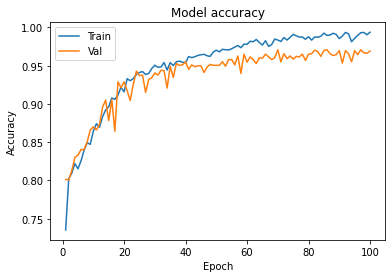

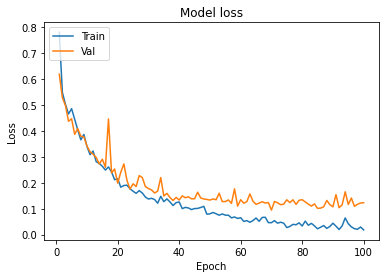

In [10]:
plot_learningCurve(history, 100) 

In [11]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

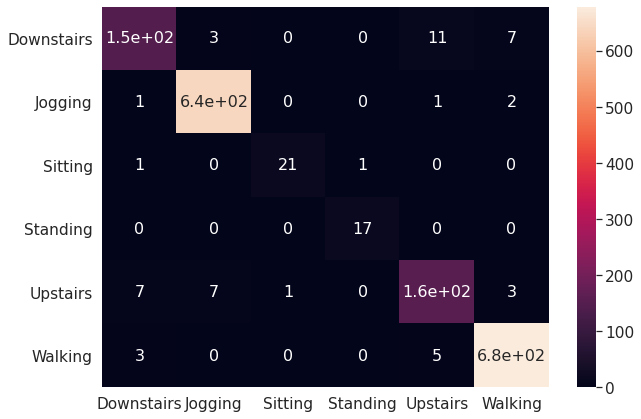

In [13]:
index=['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs','Walking']
mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(mat, index, index)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show() 

In [15]:
acc_by_class = mat.diagonal()/mat.sum(axis=1)

In [17]:
for i in range(6):
  print(index[i]+" : "+str(acc_by_class[i]))

Downstairs : 0.874251497005988
Jogging : 0.9938176197836167
Sitting : 0.9130434782608695
Standing : 1.0
Upstairs : 0.8977272727272727
Walking : 0.9883551673944687
